
###PCA



In [ ]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv("heart_disease_cleaned.csv")
X = df.drop(columns=["target"])
y = df["target"]


In [ ]:

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (303, 18)
Target shape: (303,)


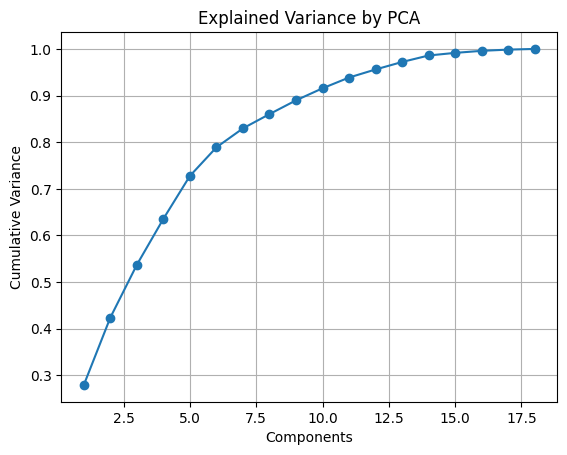

Components for 90% variance: 10


In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X)
explained = pca.explained_variance_ratio_

cum_var = np.cumsum(explained)

plt.plot(range(1,len(cum_var)+1), cum_var, marker="o")
plt.xlabel("Components")
plt.ylabel("Cumulative Variance")
plt.title("Explained Variance by PCA")
plt.grid(True)
plt.show()

n_comp = np.argmax(cum_var >= 0.90) + 1
print("Components for 90% variance:", n_comp)


###Cumulative variance plot

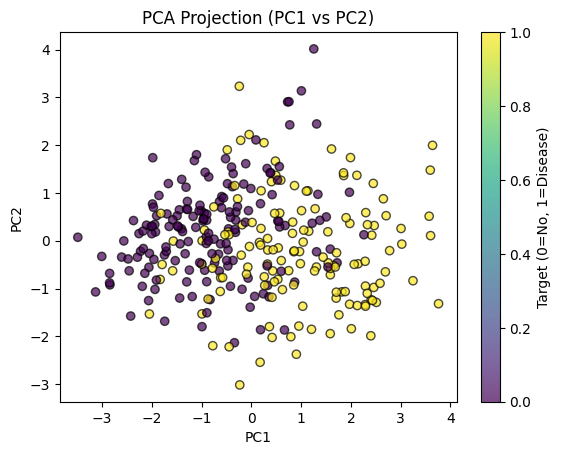

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", alpha=0.7, edgecolor="k")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (PC1 vs PC2)")
plt.colorbar(label="Target (0=No, 1=Disease)")
plt.show()


In [ ]:
# Keep only the number of components needed for 90% variance
X_pca_reduced = X_pca[:, :n_comp]

# Build PCA dataframe
df_pca = pd.DataFrame(X_pca_reduced, columns=[f"PC{i+1}" for i in range(n_comp)])
df_pca["target"] = y.values

# Save to CSV
df_pca.to_csv("heart_disease_pca.csv", index=False)

# Download to your computer
from google.colab import files
files.download("heart_disease_pca.csv")

print("PCA dataset saved as heart_disease_pca.csv and downloaded")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PCA dataset saved as heart_disease_pca.csv and downloaded


In [ ]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,0.676405,0.319590,1.270665,-0.096692,-0.361208,1.153790,-0.159689,-0.374035,0.400651,-1.047950,0
1,3.572150,0.514502,-0.193017,-0.631046,0.656140,-1.232756,0.434331,-0.399485,0.124353,-0.109540,1
2,2.405766,-1.235069,-0.591907,-0.007471,0.536252,0.496270,-0.720276,-0.042390,0.408577,0.185984,1
3,-1.333335,-0.270879,1.217331,2.760848,0.327823,1.235111,0.682292,0.219188,-0.196747,-0.386446,0
4,-1.749047,-0.297234,0.861066,0.779096,0.263300,0.187343,0.300309,-1.020257,-0.065941,-0.354516,0
